# Tema 2: Procesamiento de imágenes digitales. Operaciones de filtrado en el dominio de la frecuenia


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Pasar una función/señal 1D al dominio de la frecuencia

Vamos a generar un ejemplo con código de señal unidimensional, transformada de Fourier, filtrado en el dominio de la frecuencia, y vuelta al dominio espacial:

In [2]:
def generar_onda_sinusoidal(frecuencia, muestras_por_segundo, segundos):
    x = np.linspace(0, segundos, muestras_por_segundo * segundos, endpoint=False)
    y = np.sin(frecuencia * (2 * np.pi) * x)
    
    return x, y

Text(0.5, 0, 'segundos')

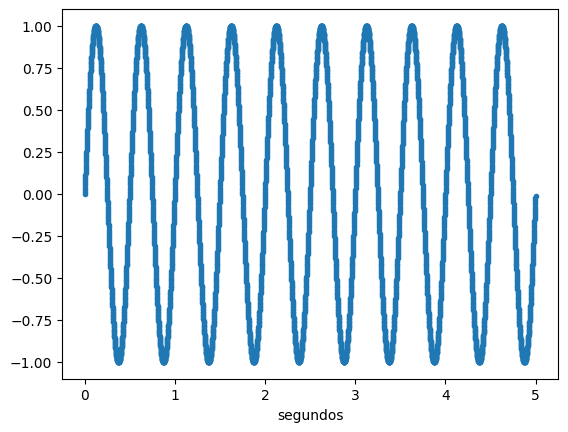

In [10]:
# Generamos una señal sinuidal de frecuencia conocida
FRECUENCIA_MUESTREO = 1000 # Hercios (muestras por segundo)
DURACION = 5 # segundos
NUM_TOTAL_MUESTRAS = FRECUENCIA_MUESTREO * DURACION

# Vamos a generar nuestra señal muestreada a una frecuencia dada
frecuencia = 2 # Hercios
x1, s1 = generar_onda_sinusoidal(frecuencia, FRECUENCIA_MUESTREO, DURACION)

plt.figure()
plt.plot(x1, s1, ".") # pintamos con '.' para que se vean las muestras
plt.xlabel("segundos")

Máxima potencia a  2.0  Hz


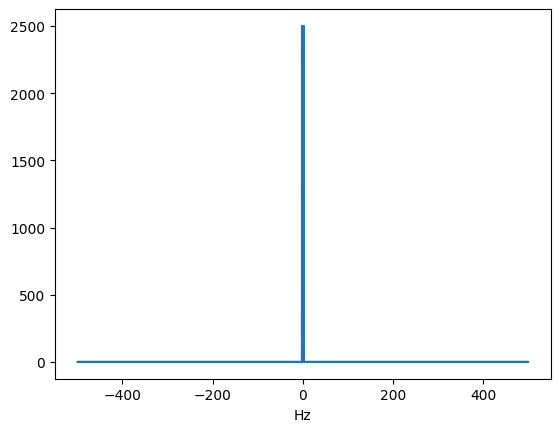

In [14]:
# Transformada Rápida de Fourier
S1 = np.fft.fft(s1)
moduloS1 = np.abs(S1) # Calcular el módulo de cada complejo en la FFT(signal)
frecuencias = np.fft.fftfreq(NUM_TOTAL_MUESTRAS, 1/FRECUENCIA_MUESTREO)
plt.plot(frecuencias, moduloS1, '-')
plt.xlabel("Hz")

# ¿A qué frecuencia tenemos la máxima potencia?
index = np.argmax(moduloS1)
print("Máxima potencia a ", abs(frecuencias[index]), " Hz")

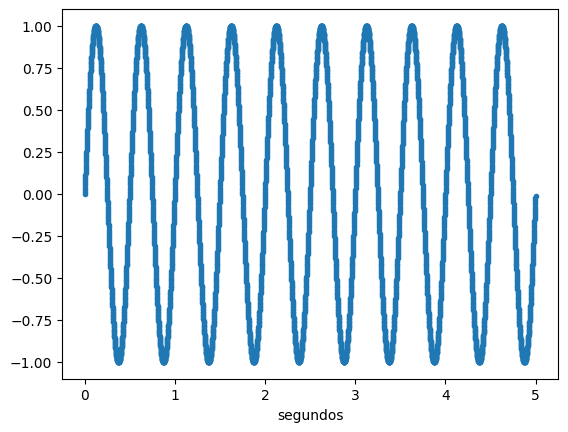

In [5]:
# Si aplicamos la transformada inversa de Fourier volvemos a recuperar la señal original
s1_recuperada = np.real(np.fft.ifft(S1))

plt.figure()
plt.xlabel("segundos")
plt.plot(x1, s1_recuperada, ".") # pintamos con '.' para que se vean las muestras

## Filtrar una función/señal 1D en el dominio de la frecuencia

Vamos a generar un ejemplo con código de señal unidimensional, transformada de Fourier, filtrado en el dominio de la frecuencia, y vuelta al dominio espacial:

Text(0.5, 0, 'segundos')

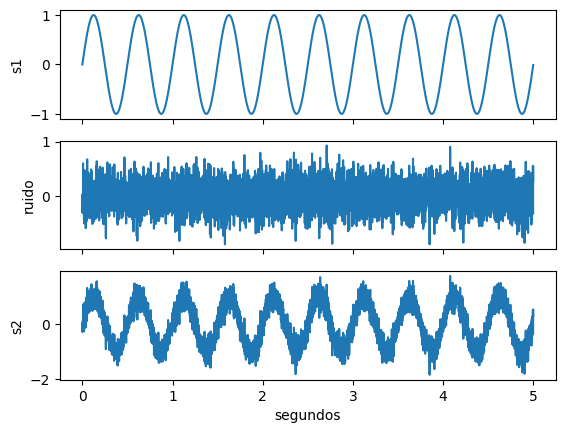

In [15]:
# Generamos una señal sinuidal de frecuencia conocida
FRECUENCIA_MUESTREO = 1000 # Hercios (muestras por segundo)
DURACION = 5 # segundos
NUM_TOTAL_MUESTRAS = FRECUENCIA_MUESTREO * DURACION

# Vamos a generar nuestra señal muestreada a una frecuencia dada
frecuencia = 2 # Hercios
x1, s1 = generar_onda_sinusoidal(frecuencia, FRECUENCIA_MUESTREO, DURACION)

# Y ahora vamos a introducir algo de ruido gaussiano.
media_ruido = 0
sigma_ruido = 0.25
ruido = np.random.normal(media_ruido, sigma_ruido, s1.shape)

# Señal + ruido
s2 = s1 + ruido

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x1, s1, "-") # pintamos con '-' uniendo las muestras con una línea
plt.xticks(color="w")
plt.ylabel("s1")

plt.subplot(3, 1, 2)
plt.plot(x1, ruido, "-") # pintamos con '-' uniendo las muestras con una línea
plt.xticks(color="w")
plt.ylabel("ruido")

plt.subplot(3, 1,  3)
plt.plot(x1, s2, "-") # pintamos con '-' uniendo las muestras con una línea
plt.ylabel("s2")
plt.xlabel("segundos")

Máxima potencia a  2.0  Hz


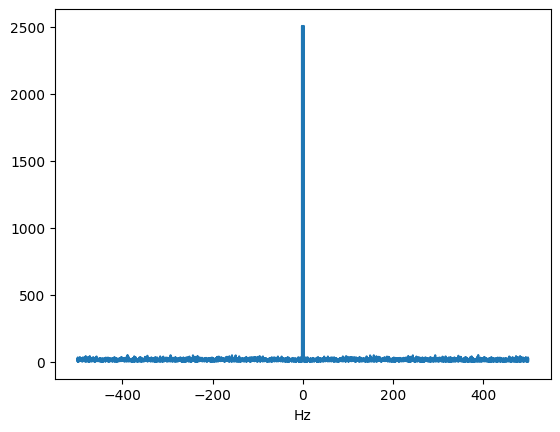

In [16]:
# Transformada de Fourier
S2 = np.fft.fft(s2)
moduloS2 = np.abs(S2) # Calcular el módulo de cada complejo en la FFT(signal)
frecuencias = np.fft.fftfreq(NUM_TOTAL_MUESTRAS, 1/FRECUENCIA_MUESTREO)
plt.plot(frecuencias, moduloS2, '-')
plt.xlabel("Hz")

# ¿A qué frecuencia tenemos la máxima potencia?
index = np.argmax(moduloS2)
print("Máxima potencia a ", abs(frecuencias[index]), " Hz")

Si queremos filtrar las frecuencias altas que supone el ruido, tendremos que hacer una operación de suavizado. Para ello conocemos la máscara que debemos utilizar: la gaussiana. En este caso lo que queremos es tener una máscara del tamaño de la señal completa pero generada con el valor de $\sigma$ que consideremos oportuno. Si hacemos la FFT de la máscara el resultado se podrá multiplicar por la FFT(señal) y haciendo la FFT inversa del resultado tendremos la señal filtrada.

(5000,)


Text(0.5, 0, 'segundos')

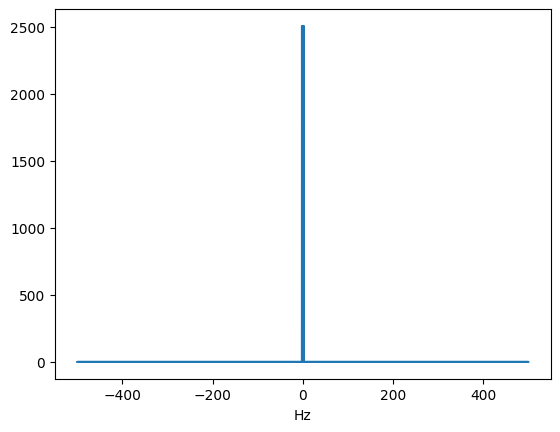

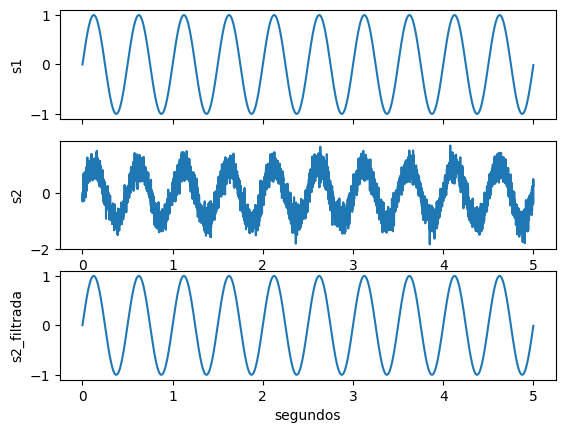

In [17]:
# Filtrado 
S2_filtrada = S2.copy()
print(S2.shape)
S2_filtrada[np.abs(S2_filtrada) < 100] = 0
plt.plot(frecuencias, np.abs(S2_filtrada), '-')
plt.xlabel("Hz")

# Transformada inversa de S2_filtrada
s2_filtrada = np.fft.ifft(S2_filtrada)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x1, s1, "-") # pintamos con '-' uniendo las muestras con una línea
plt.xticks(color="w")
plt.ylabel("s1")

plt.subplot(3, 1,  2)
plt.plot(x1, s2, "-") # pintamos con '-' uniendo las muestras con una línea
plt.ylabel("s2")
plt.xlabel("segundos")

plt.subplot(3, 1,  3)
plt.plot(x1, np.real(s2_filtrada), "-") # pintamos con '-' uniendo las muestras con una línea
plt.ylabel("s2_filtrada")
plt.xlabel("segundos")
